<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Assignment 2 - BuyWise Analytics

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

## Data Preprocessing

`Initial Inspection`

In [2]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [131]:
# Importing datasets 
features = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/stores data-set.csv")

In [132]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [24]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Statistic of each dataframe

In [25]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [26]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [27]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [7]:
num_feature_samples, num_features = features.shape
num_sale_samples, num_sale_features = sales.shape
num_stores_samples, num_stores_features = stores.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


#### Checking for missing values

In [29]:
# For the feature data 
for col in features.columns:
    count_null = features[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Date has 0 null values
The column Temperature has 0 null values
The column Fuel_Price has 0 null values
The column MarkDown1 has 4158 null values
The column MarkDown2 has 5269 null values
The column MarkDown3 has 4577 null values
The column MarkDown4 has 4726 null values
The column MarkDown5 has 4140 null values
The column CPI has 585 null values
The column Unemployment has 585 null values
The column IsHoliday has 0 null values


In [30]:
# For the sales data 
for col in sales.columns:
    count_null = sales[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Dept has 0 null values
The column Date has 0 null values
The column Weekly_Sales has 0 null values
The column IsHoliday has 0 null values


In [31]:
# For the store data 
for col in stores.columns:
    count_null = stores[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Type has 0 null values
The column Size has 0 null values


In [32]:
# Further inspecting the features dataset for missing values
nan_list = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

51% of MarkDown1 values are NaN
64% of MarkDown2 values are NaN
56% of MarkDown3 values are NaN
57% of MarkDown4 values are NaN
51% of MarkDown5 values are NaN
7% of CPI values are NaN
7% of Unemployment values are NaN


#### Checking missing values at store level

In [33]:
# Checking for missing values for store 1
store1 = features[features['Store'] == 1]
nan_list = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = store1[column_name].isnull().sum() / store1[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

51% of MarkDown1 values are NaN
60% of MarkDown2 values are NaN
51% of MarkDown3 values are NaN
51% of MarkDown4 values are NaN
51% of MarkDown5 values are NaN
7% of CPI values are NaN
7% of Unemployment values are NaN


We observe from the data the we haev some missing values in the following features: 
- `All MarkDown's`
- `Consumer Price Index`
- `Unemployment`

When dealing with missing values, it's necessary to understand why these values are missing. 
For 'CPI' and 'Unemployment' we can see that data for all store in the time period of 03-05-2013 - 26-07-2013 are missing. It is fair to assume that this is missing at random, meaning that the data is not randomly missing but there is still possilbe to predict these values. We will, therefore, impute the mising values to reduce the data loss for our ML models. 

For the markdown data, on the other hand, this is structurally missing. From the data description it is clear that we do not have data before Nov 2011. Given that the start time of the data beeing 05-02-2010, it is fair that a good amount of data is missing. When we use Store 1 as an example, we can see that for MarkDown2 there are up to 60% missing values, indicating that there is a majority of missing values than there are actual values. Knowing this, we have mainly two ways of handling this: 

- Adding a constant `0` for all missing values 
- Dropping the MarkDown columns completly

We will compare the results of these methods for our prediction models, and will mainly focus on the method that yields the best results. After inspecting a comparing the methods, we can see that ....


Reference: 
https://the.datastory.guide/hc/en-us/articles/4570444289167-Checking-and-Understanding-Missing-Data


`Data cleaning`

#### Dropping unnecessary columns 

In [4]:
sales.drop(columns=['Dept'], inplace=True)

#### Handling missing values 

In [133]:
# Codes for forward filling the missing values 
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [6]:
# Removing the 'MarkDown' columns 
features_noMD = features.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
print(features_noMD.info())
features_noMD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           8190 non-null   float64       
 5   Unemployment  8190 non-null   float64       
 6   IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 392.0 KB
None


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [134]:
# Replacing all missing values with a zero
featuresMD = features.fillna(0)
featuresMD.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


#### Transforming features

In [135]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
sales['Dept'] = label_encoder.fit_transform(sales['Dept'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

#### Merging the data

In [9]:
# without markdown
tmp_df_noMD = pd.merge(sales, features_noMD, on=['Store', 'Date', 'IsHoliday'], how='left')
df_noMD = pd.merge(stores, tmp_df_noMD, on=['Store'], how='left')
df_noMD.head()

,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,151315,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106
1,1,0,151315,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106
2,1,0,151315,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106
3,1,0,151315,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106
4,1,0,151315,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106


In [136]:
# with markdown
tmp_dfMD = pd.merge(sales, featuresMD, on=['Store', 'Date', 'IsHoliday'], how='left')
dfMD = pd.merge(stores, tmp_dfMD, on=['Store'], how='left')
dfMD.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,0,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,0,151315,0,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,0,151315,0,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,0,151315,0,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,0,151315,0,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


`Exploratory Data Analysis`

#### Analysing the data by date 

In [11]:
# Grouping by date 
df_date = df_noMD.groupby('Date').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min'}).reset_index()
df_date.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday
0,2010-02-05,33.277942,2.717869,167.398405,8.576731,16836.121997,0
1,2010-02-12,33.361810,2.696102,167.384138,8.567309,16352.056032,1
2,2010-02-19,37.038310,2.673666,167.338966,8.576351,16216.658979,0
3,2010-02-26,38.629563,2.685642,167.691019,8.561375,14899.549688,0
4,2010-03-05,42.373998,2.731816,167.727351,8.572689,15921.015727,0


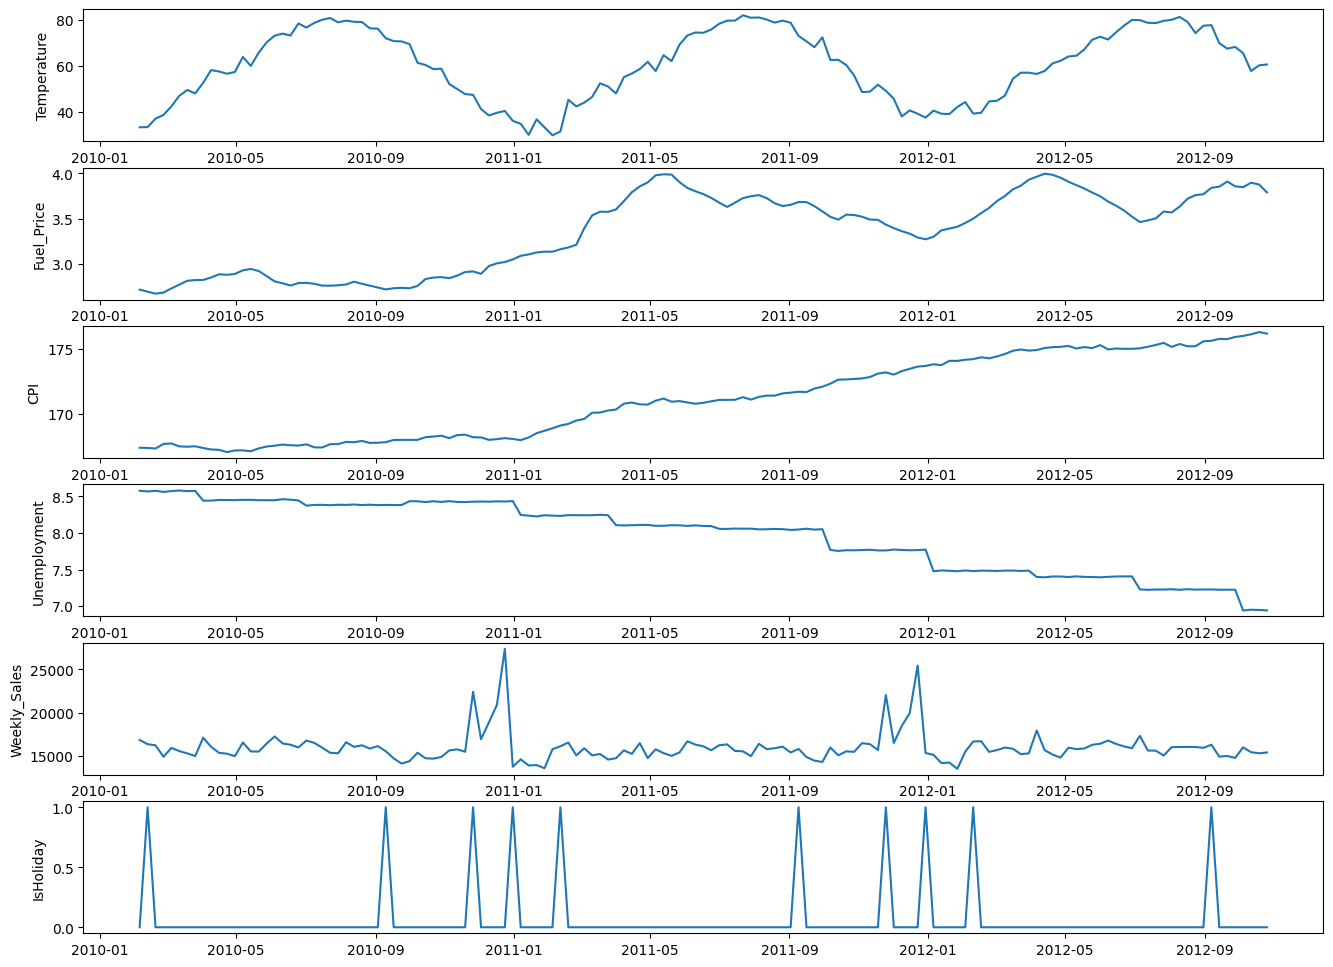

In [12]:
# Plotting all features
fig = plt.figure(figsize = (16, 12))
count_columns_ex_date = len(df_date.columns[1:])
for idx, col in enumerate(df_date.columns[1:]):
    plt.subplot(count_columns_ex_date, 1, idx+1)
    plt.plot(df_date["Date"], df_date[col])
    plt.ylabel(col)

Text(0.5, 1.0, 'Total Weekly Sales')

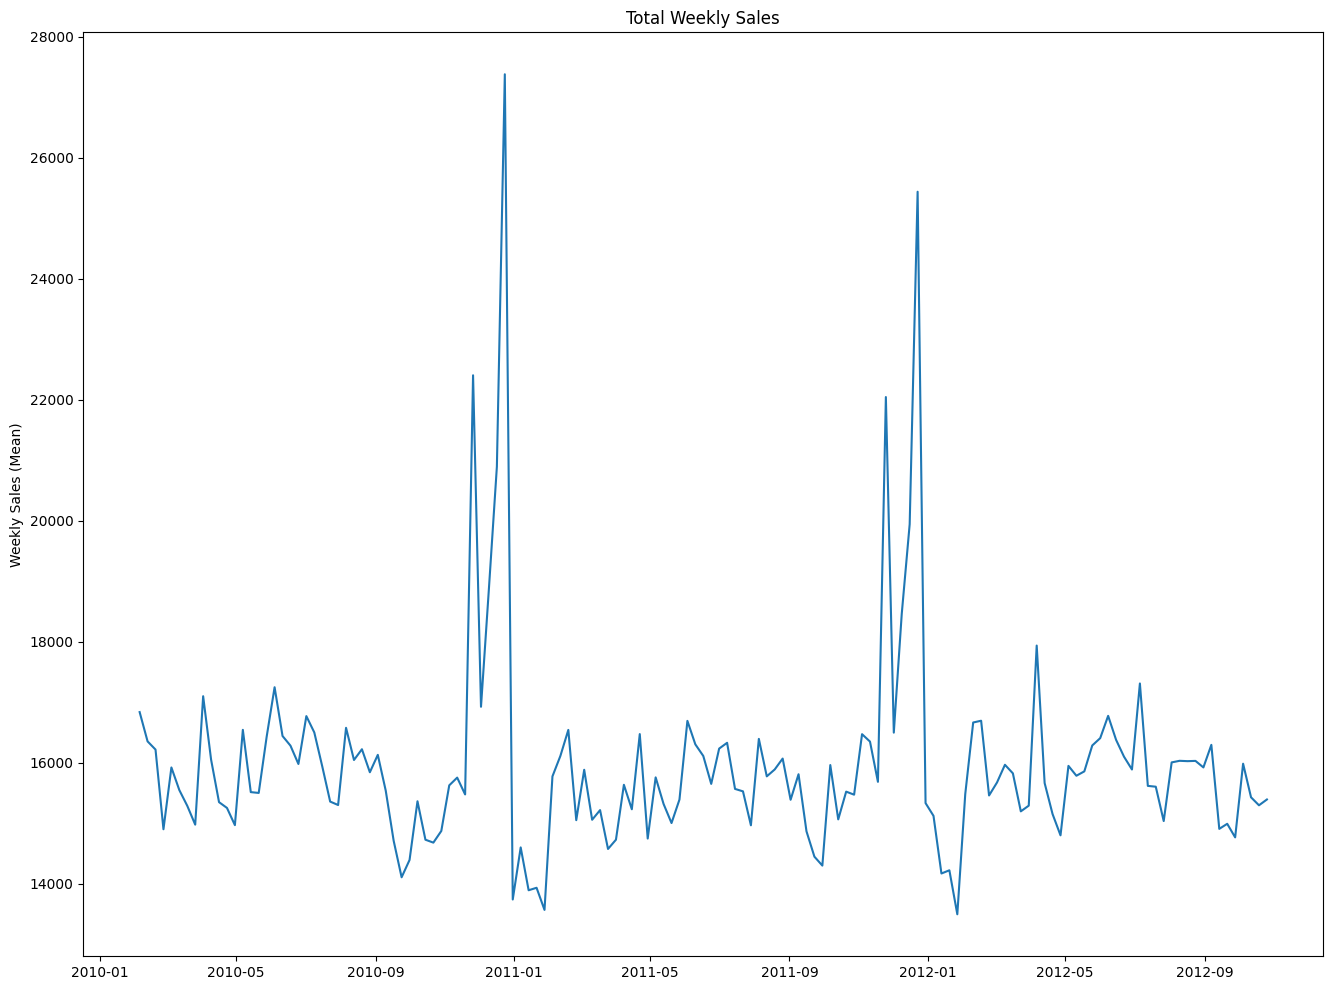

In [13]:
# Plotting Weekly Sales alone
fig = plt.figure(figsize = (16, 12))
plt.plot(df_date["Date"], df_date["Weekly_Sales"])
plt.ylabel("Weekly Sales (Mean)")
plt.title('Total Weekly Sales')

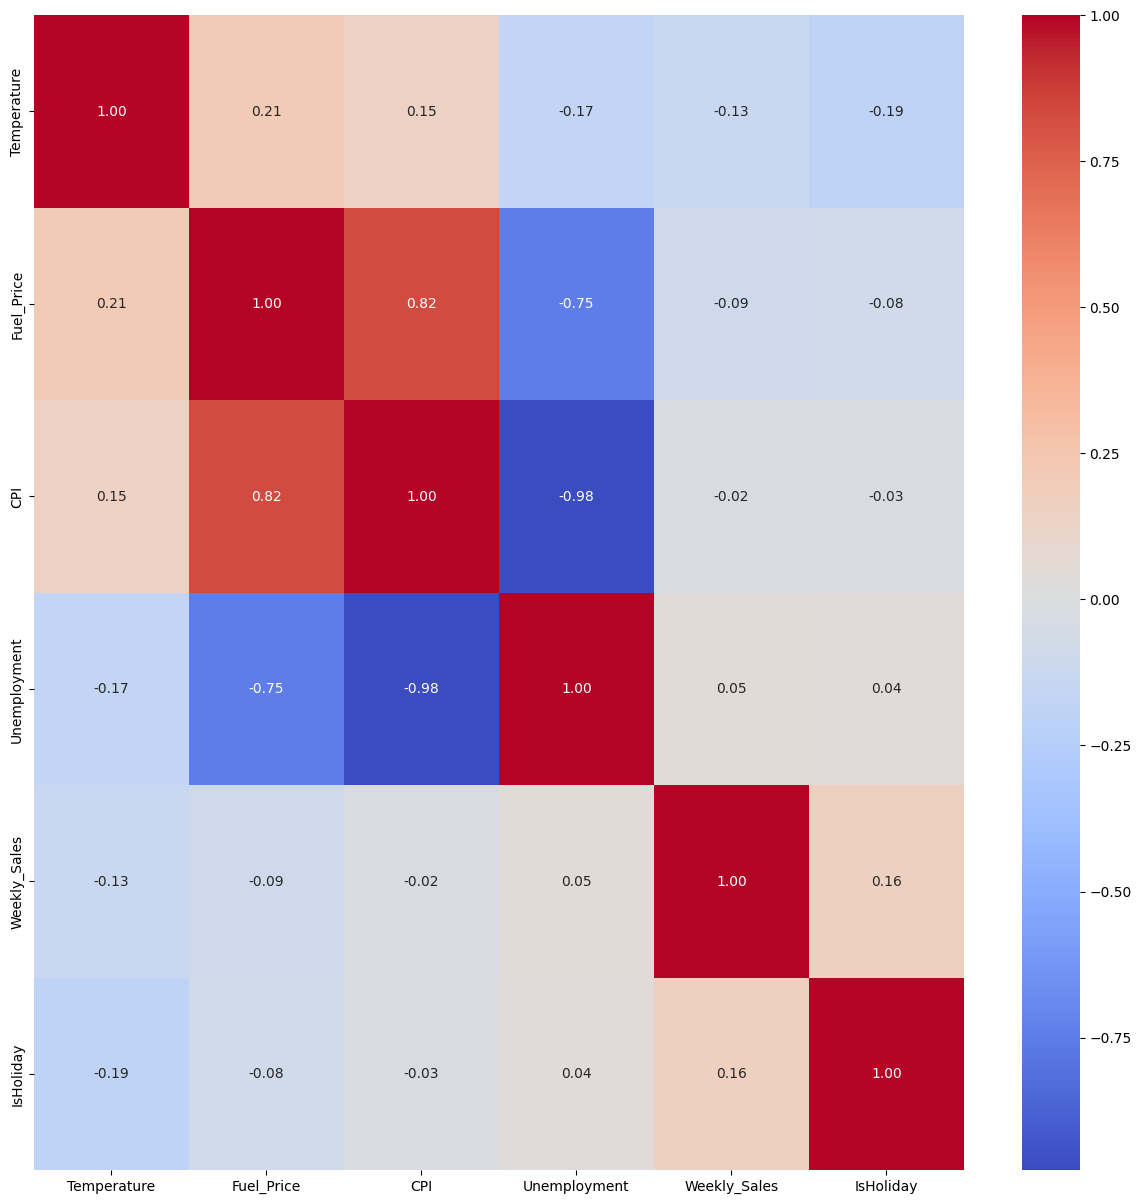

In [14]:
#correlation matrix to see which features are highly correlated to the Weekly Sales feature
corr_matrix = df_date.corr()
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

In [15]:
# Grouping by date 
df_dateMD = dfMD.groupby('Date').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min',
                                       'MarkDown1': 'mean',
                                       'MarkDown2': 'mean',
                                       'MarkDown3': 'mean',
                                       'MarkDown4': 'mean',
                                       'MarkDown5': 'mean'}).reset_index()
df_dateMD.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,2010-02-05,33.277942,2.717869,167.398405,8.576731,16836.121997,0,0.0,0.0,0.0,0.0,0.0
1,2010-02-12,33.361810,2.696102,167.384138,8.567309,16352.056032,1,0.0,0.0,0.0,0.0,0.0
2,2010-02-19,37.038310,2.673666,167.338966,8.576351,16216.658979,0,0.0,0.0,0.0,0.0,0.0
3,2010-02-26,38.629563,2.685642,167.691019,8.561375,14899.549688,0,0.0,0.0,0.0,0.0,0.0
4,2010-03-05,42.373998,2.731816,167.727351,8.572689,15921.015727,0,0.0,0.0,0.0,0.0,0.0


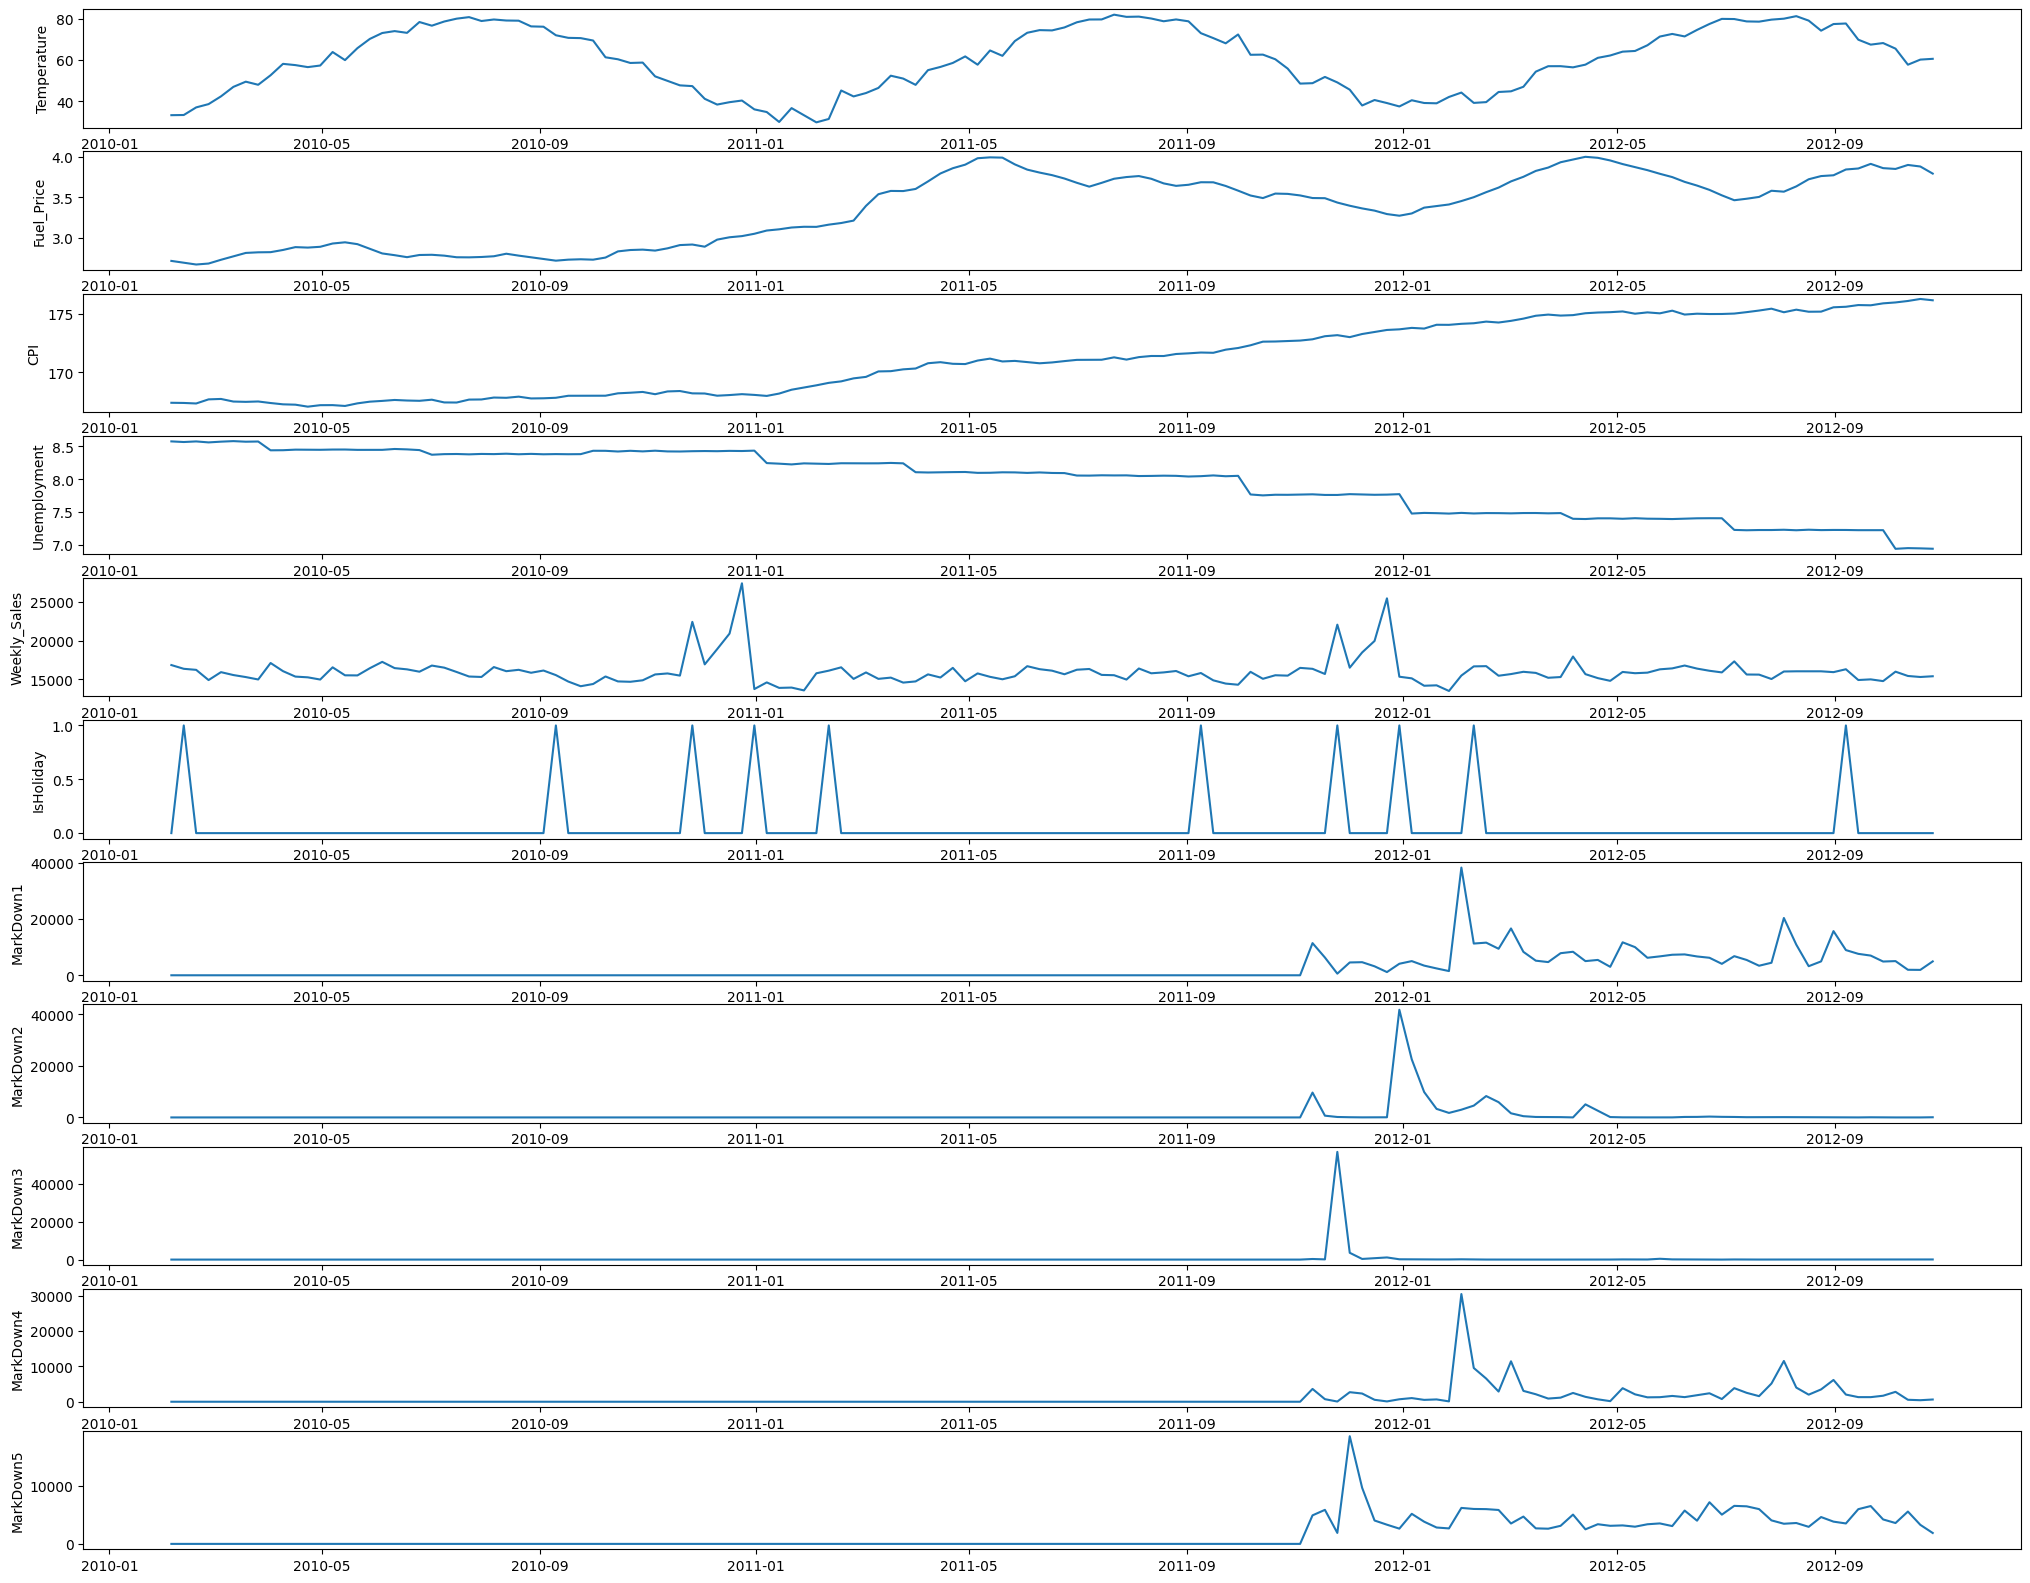

In [16]:
# Plotting all features
fig = plt.figure(figsize = (25, 20))
count_columns_ex_dateMD = len(df_dateMD.columns[1:])
for idx, col in enumerate(df_dateMD.columns[1:]):
    plt.subplot(count_columns_ex_dateMD, 1, idx+1)
    plt.plot(df_dateMD["Date"], df_dateMD[col])
    plt.ylabel(col)

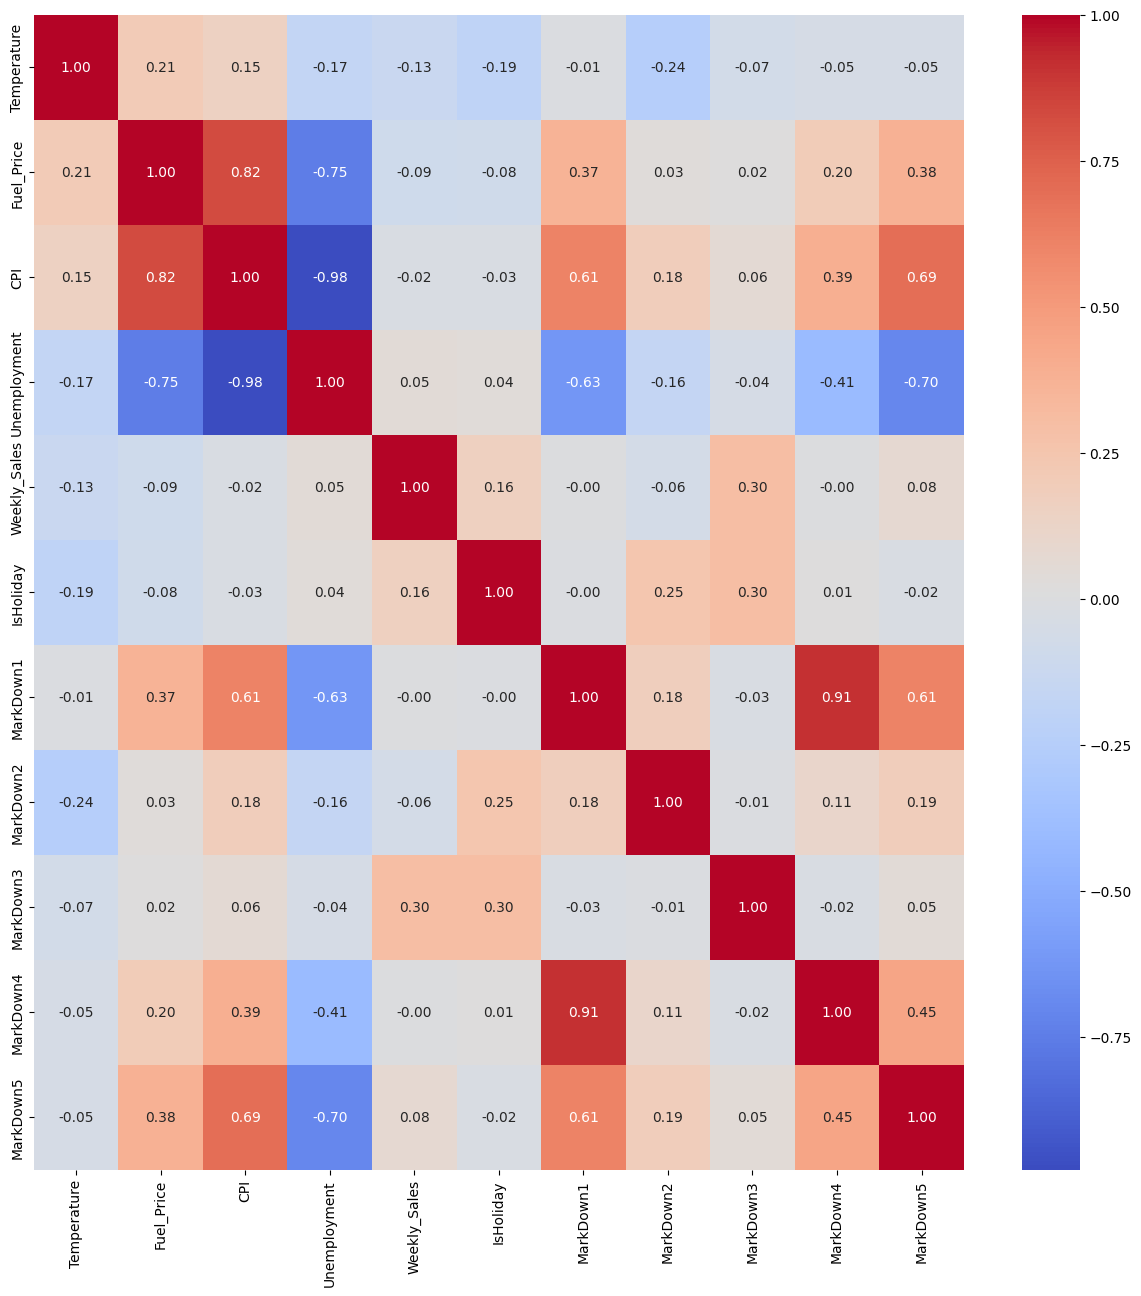

In [17]:
#correlation matrix to see which features are highly correlated to the Weekly Sales feature
corr_matrixMD = df_dateMD.corr()
corr_matrixMD["Weekly_Sales"].sort_values(ascending=False)

# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrixMD, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

#### Analysing the data storewise

In [18]:
# grouping by store 
df_store_noMD = df_noMD.groupby('Store').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min',
                                       'Type': 'min',
                                       'Size': 'min'}).reset_index()
df_store_noMD.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday,Type,Size
0,1,68.224463,3.218811,215.995525,7.610918,21710.543621,0,0,151315
1,2,68.105435,3.219898,215.651869,7.623279,26898.070031,0,0,202307
2,3,71.298627,3.219112,219.402843,7.175602,6373.033983,0,1,37392
3,4,62.176867,3.216237,128.680070,5.965849,29161.210415,0,0,205863
4,5,69.203619,3.220912,216.576516,6.296549,5053.415813,0,1,34875


In [19]:
df_store_noMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         45 non-null     int64  
 1   Temperature   45 non-null     float64
 2   Fuel_Price    45 non-null     float64
 3   CPI           45 non-null     float64
 4   Unemployment  45 non-null     float64
 5   Weekly_Sales  45 non-null     float64
 6   IsHoliday     45 non-null     int64  
 7   Type          45 non-null     int32  
 8   Size          45 non-null     int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 3.1 KB


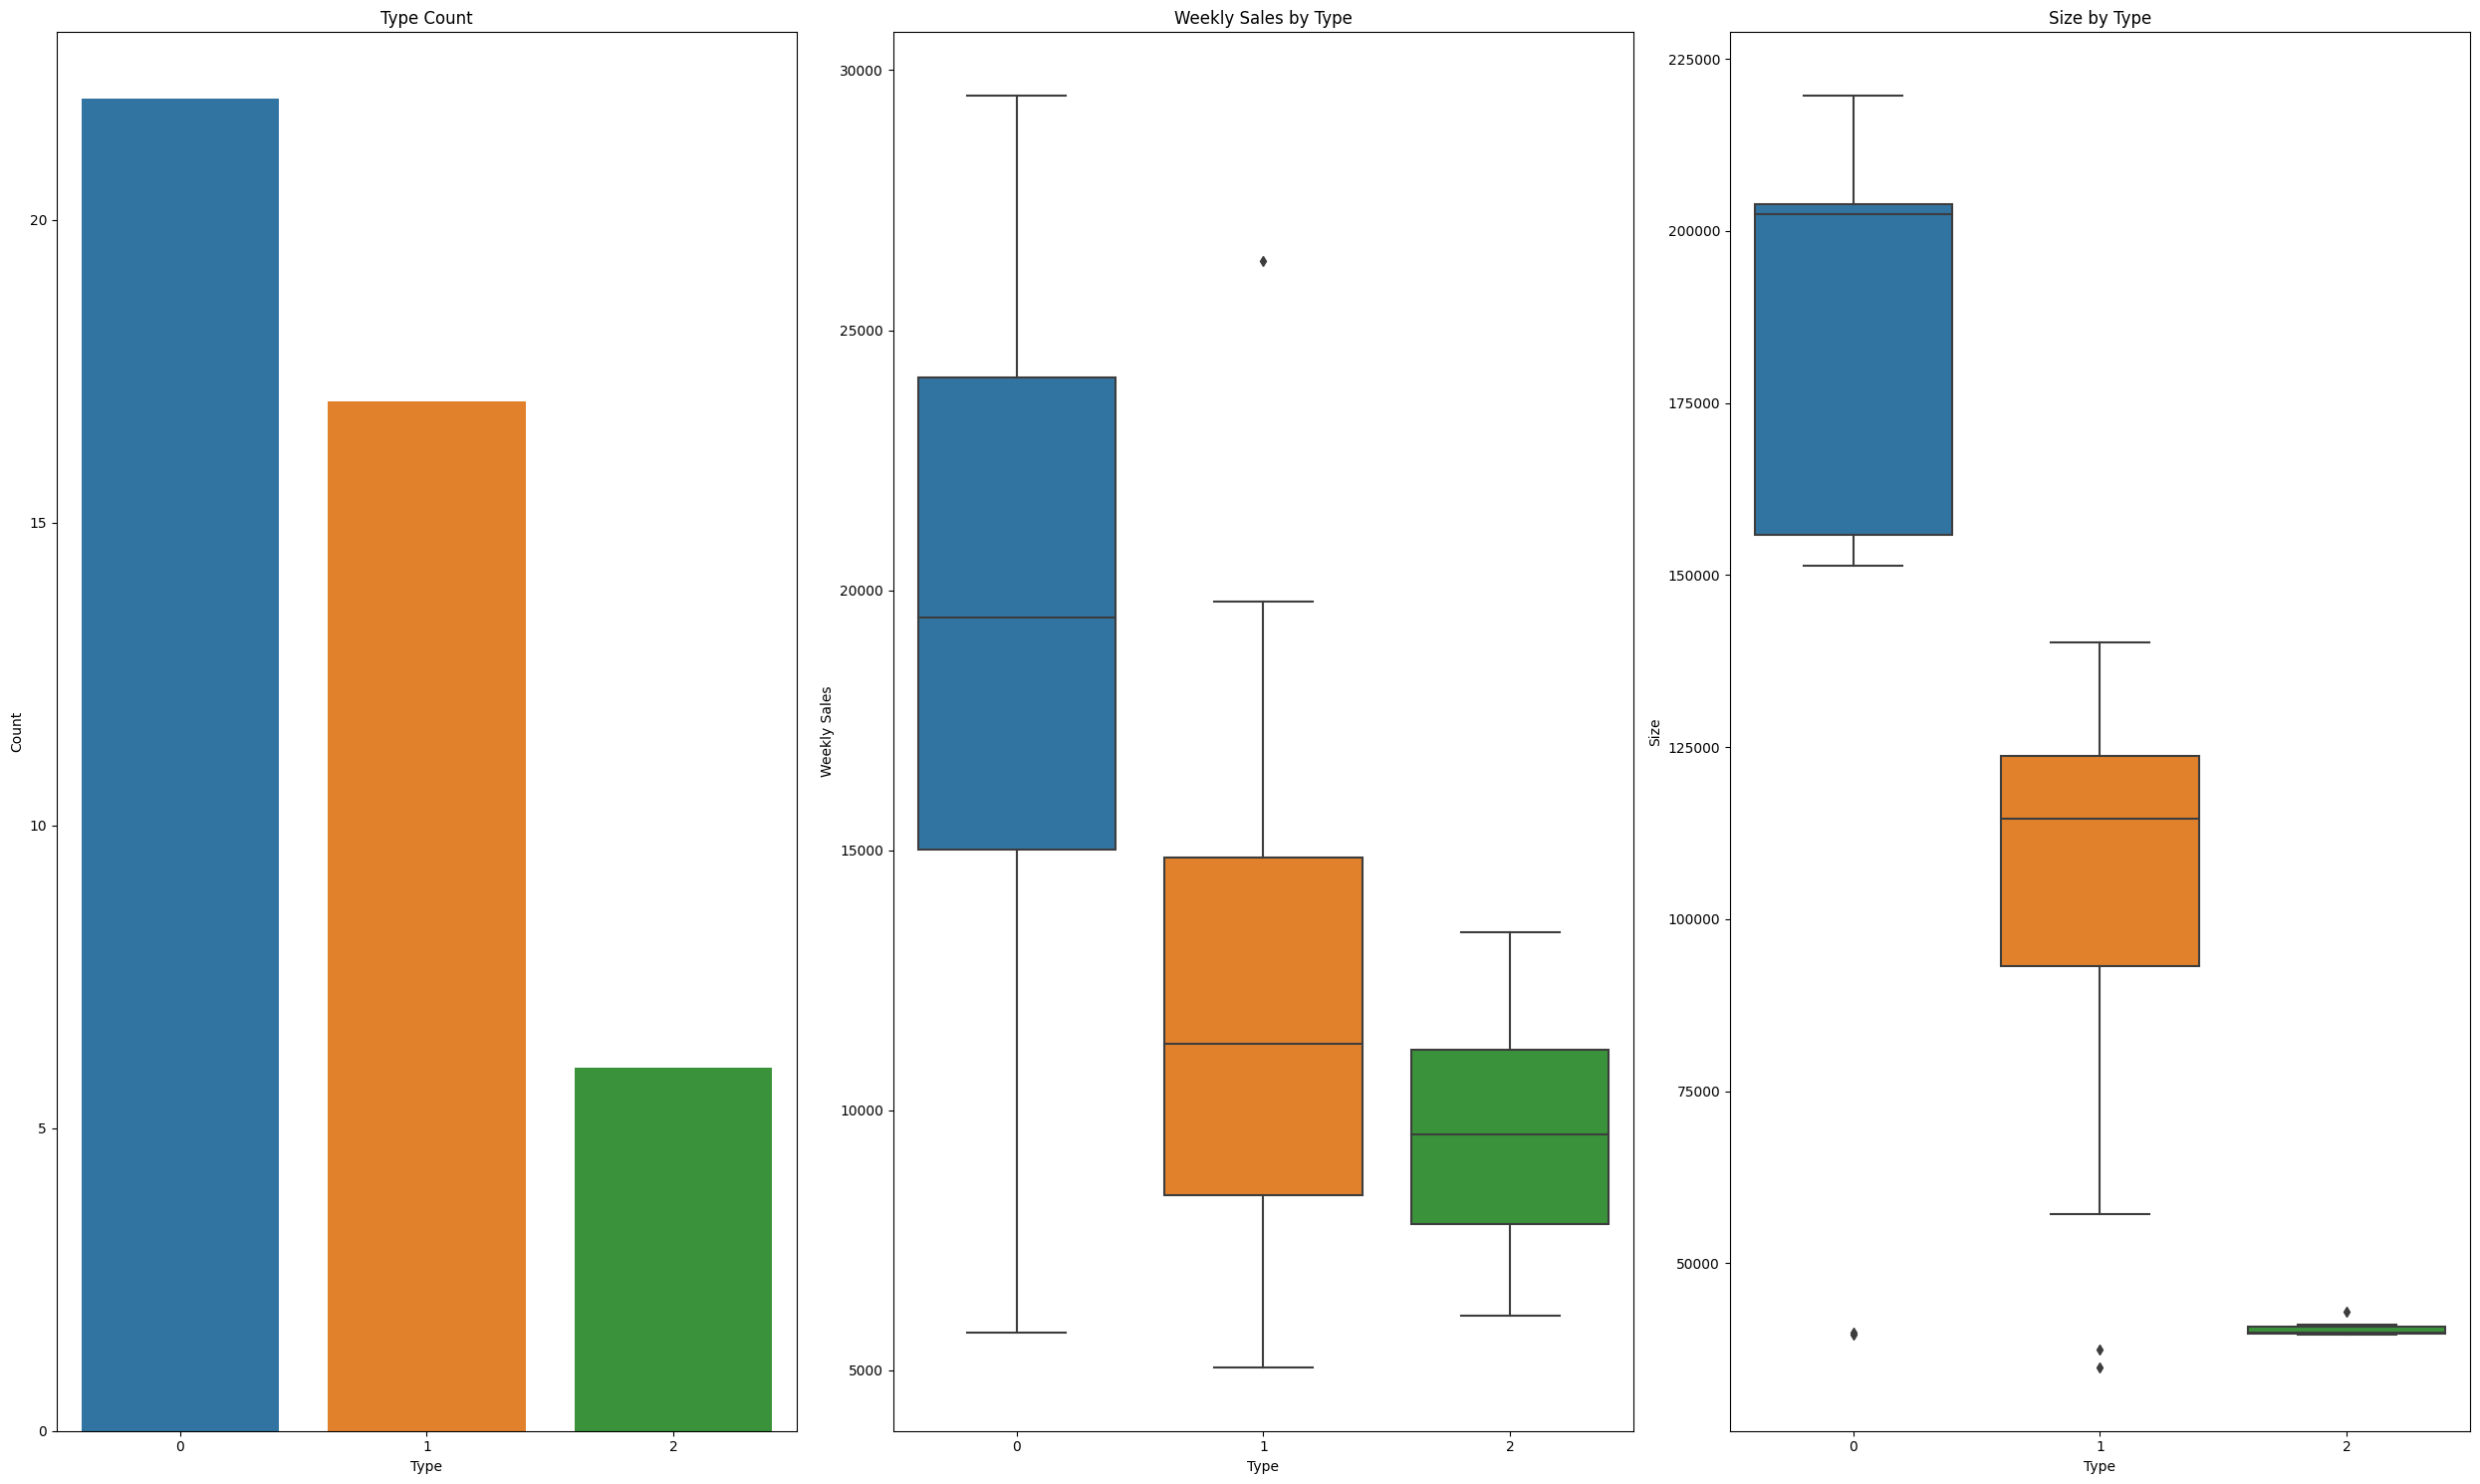

In [20]:
# Ensure the 'Type' column is categorical
df_store_noMD['Type'] = df_store_noMD['Type'].astype('category')

# Checking the categorical variables
col_categorical = df_store_noMD.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Bar plots for categorical variables
for i, j in enumerate(col_categorical):
    value_counts_df = df_store_noMD[j].value_counts().sort_values(ascending=False).to_frame()
    ax = axes[i]
    sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette, ax=ax)
    for x, y in enumerate(value_counts_df[j]):
        ax.text(x, y, str(y), ha='center', va='bottom')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(j)

# Additional subplots
ax_count = axes[0]
sns.countplot(data=df_store_noMD, x="Type", ax=ax_count)  # Use countplot for count
ax_count.set_xlabel("Type")
ax_count.set_ylabel("Count")
ax_count.set_title("Type Count")

ax_box1 = axes[1]
sns.boxplot(data=df_store_noMD, y="Weekly_Sales", x="Type", ax=ax_box1)
ax_box1.set_xlabel("Type")
ax_box1.set_ylabel("Weekly Sales")
ax_box1.set_title("Weekly Sales by Type")

ax_box2 = axes[2]
sns.boxplot(data=df_store_noMD, y="Size", x="Type", ax=ax_box2)
ax_box2.set_xlabel("Type")
ax_box2.set_ylabel("Size")
ax_box2.set_title("Size by Type")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Store Number')

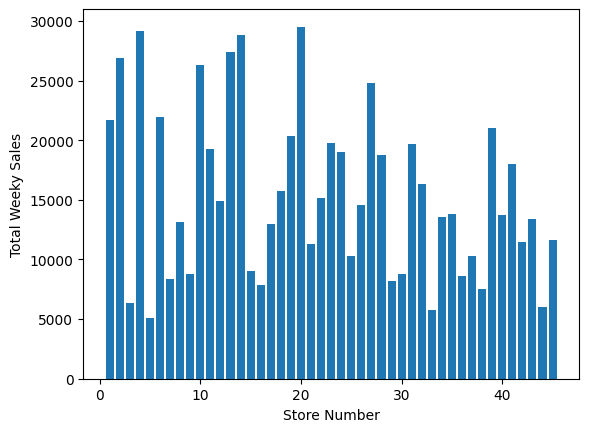

In [21]:
# weekly sales per store
bins = np.arange(1, 46)
plt.bar(x=bins, height=df_store_noMD["Weekly_Sales"].to_numpy())
plt.ylabel('Total Weeky Sales')
plt.xlabel("Store Number")

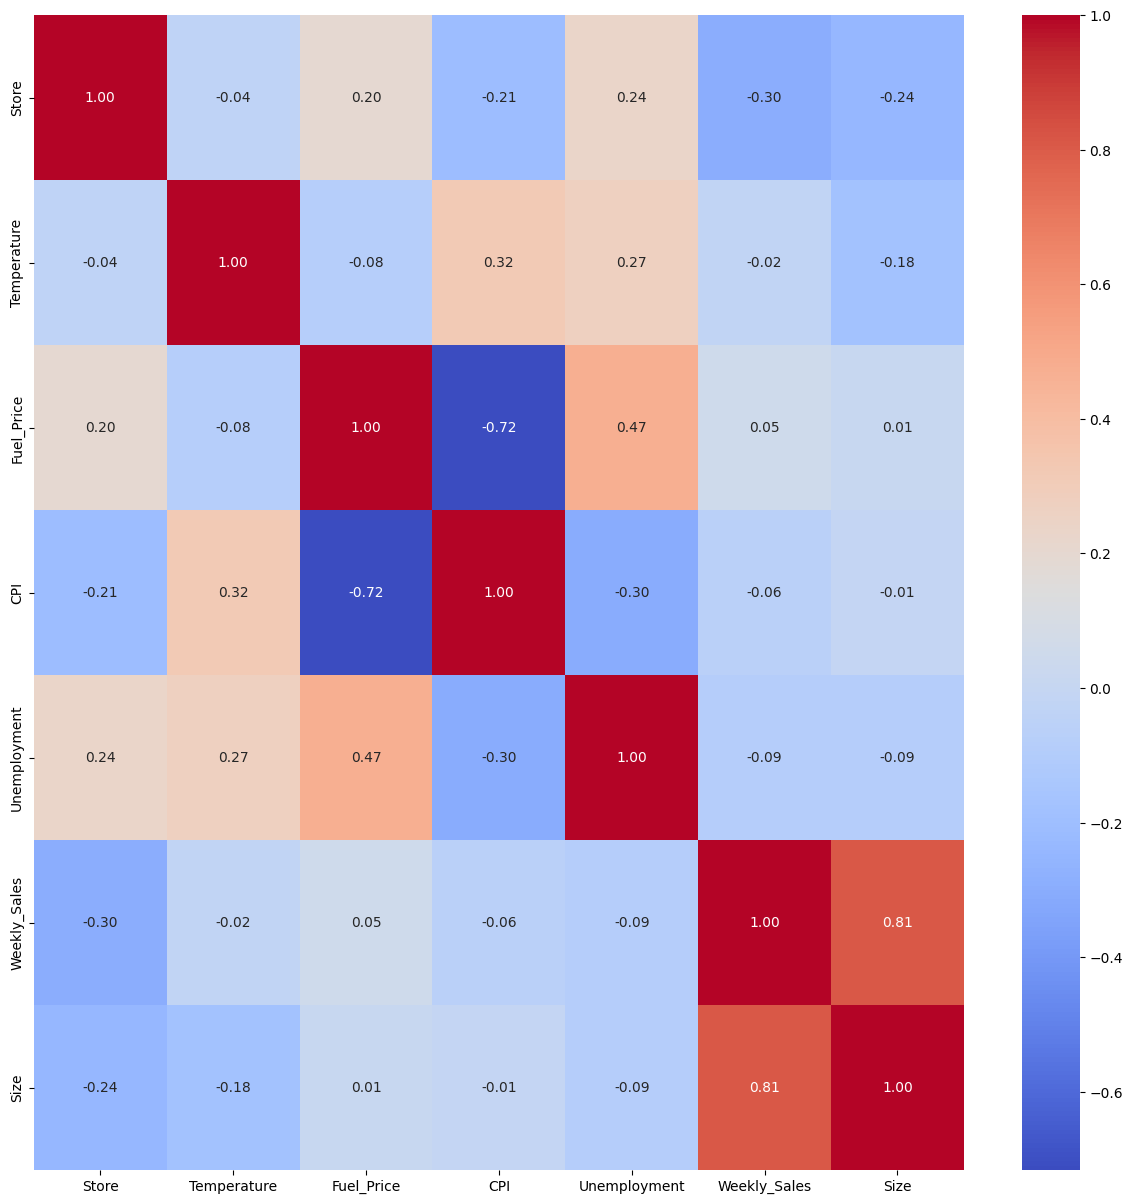

In [22]:
#correlation matrix to see which features are highly correlated to the Weekly Sales feature
df_store_noMD.drop(columns=['IsHoliday'], inplace=True)
corr_matrix_snMD = df_store_noMD.corr()
corr_matrix_snMD["Weekly_Sales"].sort_values(ascending=False)

# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_snMD, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

## Model Creation

`Clustering Model`

`Prediction Models`

A proposition for predicting the weekly sales: 
- Analyse the data and figure out the most successful store 
- Use this information to predict the weekly sales for the given store 
- From thre predictions, we can analyse feature importnace for the predictions 
- analyse the feature importance analysis to the inntial analysis for the given store to see what indicators determine the sucess for the store 
- Argue for how this process could be automatized for every store, so that we have a pipeline which would predict the weekly sales for each store individually

This would simplify the predictions, and we could just create visualz and explain how this could be scaled in the business 

#### Preparing the data for predictions 

In [11]:
# Creating WeekofYear categorical features 
copy = dfMD
copy['Year'] = copy.Date.dt.year
copy['WeekOfYear'] = copy.Date.dt.isocalendar().week
# Convert year, month and day to categorical values 
converted = pd.get_dummies(copy, columns=['Year', 'WeekOfYear'])

# Removing the olumn Date
converted.drop('Date', axis=1, inplace=True)
converted.head()

,Store,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
0,1,0,151315,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,151315,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,151315,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,151315,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,151315,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
num_samples, num_features = converted.shape
print(f'The converted dataframe as {num_samples} samples and each sample has {num_features} features')

The converted dataframe as 421570 samples and each sample has 69 features


In [13]:
# Scaling the numerical features 
num = converted[['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

# Scaler
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num)

# Replace the original columns iwht scaled values 
converted[['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = scaled_num

converted.head()

,Store,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
0,1,0,0.239209,0.393782,0,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.239209,1.323501,1,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.239209,1.127829,0,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0.239209,0.150687,0,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0.239209,0.257435,0,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Defining the target variable 
X = converted.drop(columns=['Weekly_Sales'])
y = converted['Weekly_Sales']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 45)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(295099, 68) (126471, 68) (295099,) (126471,)


In [39]:
# Feature scaling 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Initialising the Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.9087663800983848
Mean Absolute Error: 0.6331937003876961
R-squared: 0.06880015451180543


In [17]:
accuracy = lr.score(X_test, y_test)
print(accuracy)

0.06880015451180543


### Trying something for linear regression forecast 

In [18]:
dfMD.head()

,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,WeekOfYear
0,1,0,151315,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5
1,1,0,151315,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,6
2,1,0,151315,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,7
3,1,0,151315,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,8
4,1,0,151315,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,9


In [137]:
# Extractign week and year from dates 
dfMD['Week'] = [i.week for i in dfMD['Date']]
dfMD['Year'] = [i.year for i in dfMD['Date']]

# Create a sequence of numbers 
dfMD['Series'] = np.arange(1, len(dfMD) + 1)

# Drop unnecessary columns and re-arrenge 
dfMD.drop(['Date'], axis=1, inplace=True)
dfMD = dfMD[['Series', 'Year', 'Week', 'Store', 'Type', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']]
dfMD.head()

,Series,Year,Week,Store,Type,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
0,1,2010,5,1,0,151315,0,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,0.0,24924.50
1,2,2010,6,1,0,151315,1,38.51,2.548,211.242170,8.106,0.0,0.0,0.0,0.0,0.0,46039.49
2,3,2010,7,1,0,151315,0,39.93,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,0.0,41595.55
3,4,2010,8,1,0,151315,0,46.63,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,0.0,19403.54
4,5,2010,9,1,0,151315,0,46.50,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,0.0,21827.90


In [137]:
df_noMD['Series']

0              1
1              2
2              3
3              4
4              5
           ...  
421565    421566
421566    421567
421567    421568
421568    421569
421569    421570
Name: Series, Length: 421570, dtype: int32

In [138]:
# Splitting the data 
train = dfMD[dfMD['Series'] < 295099]
test = dfMD[dfMD['Series'] >= 295099]

# Check shape 
train.shape, test.shape

((295098, 17), (126472, 17))

In [139]:
X_train = train.drop(columns=['Weekly_Sales'])
X_test = test.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']
y_test = test['Weekly_Sales']

In [140]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(295098, 16) (295098,) (126472, 16) (126472,)


In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [142]:
# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 466780828.6162808
Mean Absolute Error: 14131.850021732767
R-squared: -0.2539957972035931


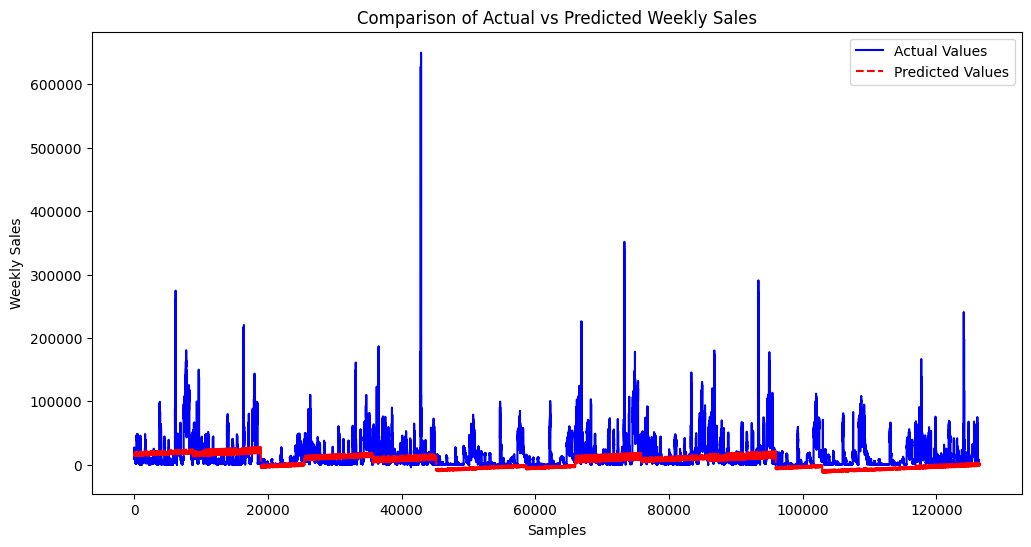

In [143]:
import matplotlib.pyplot as plt

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('Comparison of Actual vs Predicted Weekly Sales')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


In [144]:
# Filtering for just one store 
df_store1 = dfMD[dfMD['Store'] == 1]
df_store1['Week']

0         5
1         6
2         7
3         8
4         9
         ..
10239    35
10240    36
10241    37
10242    40
10243    41
Name: Week, Length: 10244, dtype: int64

Mean Squared Error: 2066613089.1282418
Mean Absolute Error: 30948.110725330014
R-squared: -0.4250404165971673


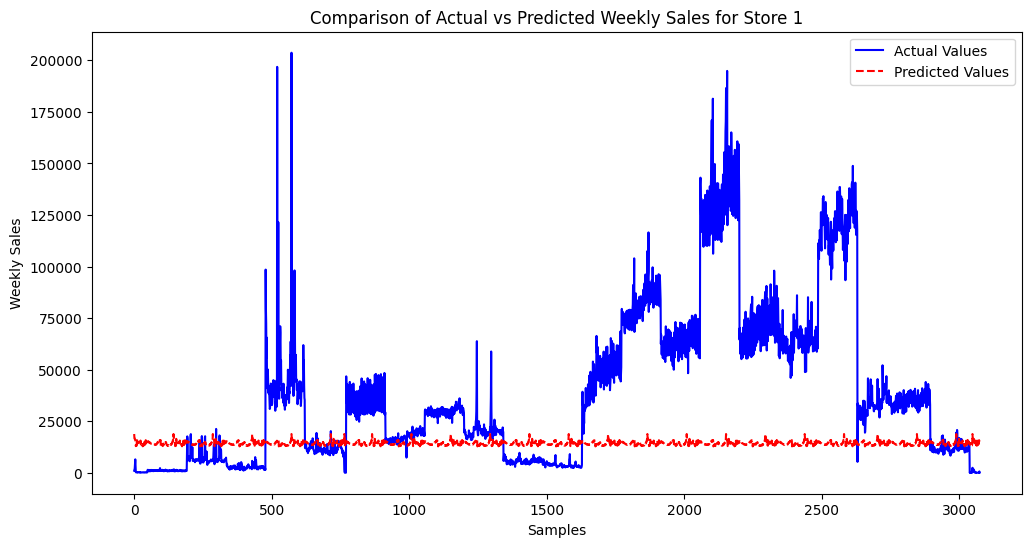

In [145]:
# Filtering data for Store 1
store_1_data = dfMD[dfMD['Store'] == 1]

# Splitting the data
train = store_1_data[store_1_data['Series'] < 7170]
test = store_1_data[store_1_data['Series'] >= 7170]

# Extracting features and target for training and testing
X_train = train.drop(columns=['Weekly_Sales', 'Series'])
X_test = test.drop(columns=['Weekly_Sales', 'Series'])
y_train = train['Weekly_Sales']
y_test = test['Weekly_Sales']

# Fitting the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('Comparison of Actual vs Predicted Weekly Sales for Store 1')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


Random Forest Mean Squared Error: 2063797218.3146873
Random Forest Mean Absolute Error: 30948.756148874378
Random Forest R-squared: -0.4230987228479399


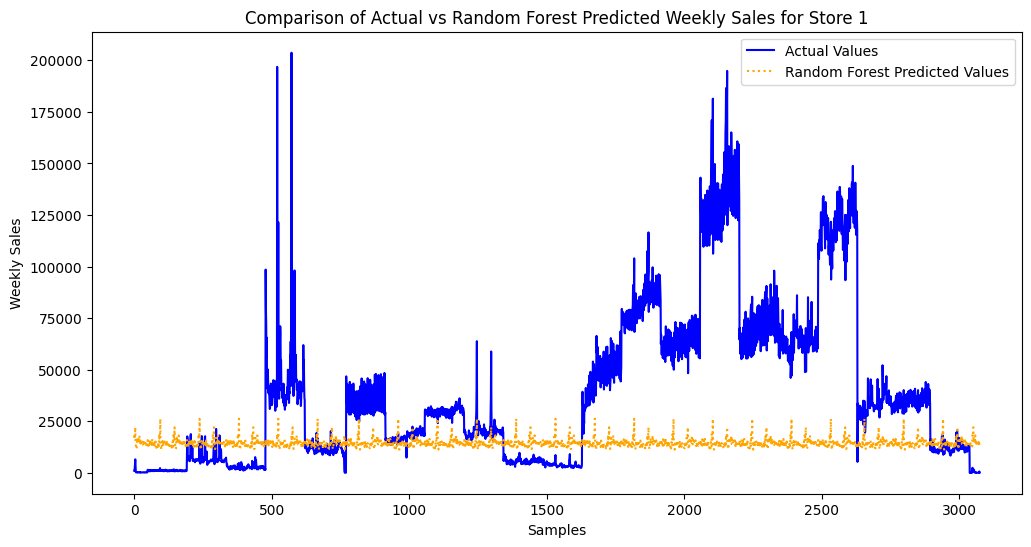

In [146]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest R-squared:", r2_rf)

# Visualizing the Random Forest predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(y_pred_rf, label='Random Forest Predicted Values', color='orange', linestyle='dotted')
plt.title('Comparison of Actual vs Random Forest Predicted Weekly Sales for Store 1')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


# Trying out again 

#### Dropping all visualizations and EDA for the purpose of getting propper predictions

In [3]:
# Importing datasets 
features = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/stores data-set.csv")

In [4]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [5]:
# Codes for forward filling the missing values 
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [6]:
# Adding zeros for MarkDown features 
features = features.fillna(0)

In [7]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
sales['Dept'] = label_encoder.fit_transform(sales['Dept'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

In [8]:
# Merging the data
tmp_df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(stores, tmp_df, on=['Store'], how='left')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,0,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,0,151315,0,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,0,151315,0,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,0,151315,0,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,0,151315,0,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [9]:
# Getting the data for one store 
dfStore1 = df[df['Store'] == 1]
dfStore1.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,0,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,0,151315,0,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,0,151315,0,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,0,151315,0,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,0,151315,0,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [10]:
dfStore1.drop(columns=['Dept'] ,axis=1, inplace=True)
dfStore1.head()

C:\Users\fredr\AppData\Local\Temp\ipykernel_7884\3410613241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfStore1.drop(columns=['Dept'] ,axis=1, inplace=True)


,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,0,151315,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,0,151315,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,0,151315,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,0,151315,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [11]:
# Splitting the data into train- and test set
train = dfStore1[dfStore1['Date'] < '2011-12-02']
test = dfStore1[dfStore1['Date'] >= '2011-12-02']

In [12]:
# Function for creating time features 
def create_time_feature(df):
    df['dayofmonth'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['weekofyear'] = df['Date'].dt.weekofyear
    return df

In [13]:
train = create_time_feature(train)
test = create_time_feature(test)
train.head()

C:\Users\fredr\AppData\Local\Temp\ipykernel_7884\1416085448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofmonth'] = df['Date'].dt.day
C:\Users\fredr\AppData\Local\Temp\ipykernel_7884\1416085448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['Date'].dt.dayofweek
C:\Users\fredr\AppData\Local\Temp\ipykernel_7884\1416085448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,dayofmonth,dayofweek,quarter,month,year,dayofyear,weekofyear
0,1,0,151315,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,5,4,1,2,2010,36,5
1,1,0,151315,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,...,0.0,211.242170,8.106,12,4,1,2,2010,43,6
2,1,0,151315,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,...,0.0,211.289143,8.106,19,4,1,2,2010,50,7
3,1,0,151315,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,...,0.0,211.319643,8.106,26,4,1,2,2010,57,8
4,1,0,151315,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,...,0.0,211.350143,8.106,5,4,1,3,2010,64,9


In [14]:
# Setting date as index 
train = train.set_index('Date')
test = test.set_index('Date')
train.head()

,Store,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,dayofmonth,dayofweek,quarter,month,year,dayofyear,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,151315,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,5,4,1,2,2010,36,5
2010-02-12,1,0,151315,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,12,4,1,2,2010,43,6
2010-02-19,1,0,151315,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,19,4,1,2,2010,50,7
2010-02-26,1,0,151315,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,26,4,1,2,2010,57,8
2010-03-05,1,0,151315,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,5,4,1,3,2010,64,9


In [15]:
# Defining target variable and features 
X_train = train.drop('Weekly_Sales', axis=1)
y_train = train['Weekly_Sales']

X_test = test.drop('Weekly_Sales', axis=1)
y_test = test['Weekly_Sales']

In [16]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train,y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# Evaluating the model 

# Getting the predicted values from the regressor 
test['Predictions'] = reg.predict(X_test)

# Evaluation metrics
mse = mean_absolute_error(test['Weekly_Sales'], test['Predictions'])
mae = mean_absolute_error(test['Weekly_Sales'], test['Predictions'])
r2 = r2_score(test['Weekly_Sales'], test['Predictions'])

# Printing the evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 20574.7895
Mean Absolute Error: 20574.7895
R-squared: 0.0013


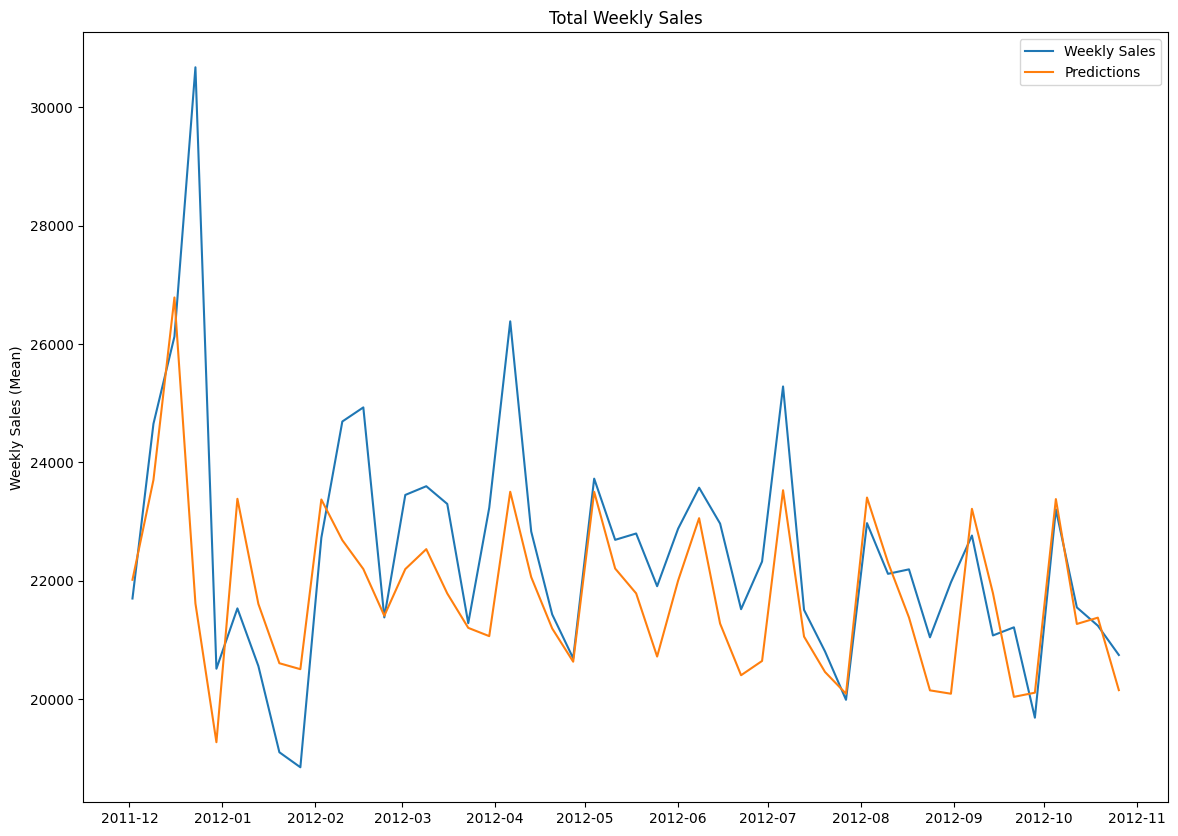

In [18]:
# Plotting the visualizations 

# Grouping the testset to prepare for visualizations
test.reset_index(inplace=True)
test_date = test.groupby('Date').agg({'Weekly_Sales': 'mean',
                                        'Predictions': 'mean'}).reset_index()

# Plotting both 'Weekly_Sales' and 'Predictions'
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(test_date['Date'], test_date['Weekly_Sales'], label='Weekly Sales')
ax.plot(test_date['Date'], test_date['Predictions'], label='Predictions')

# Adding labels and title
ax.set_ylabel("Weekly Sales (Mean)")
ax.set_title('Total Weekly Sales')
ax.legend()

# Displaying the plot
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

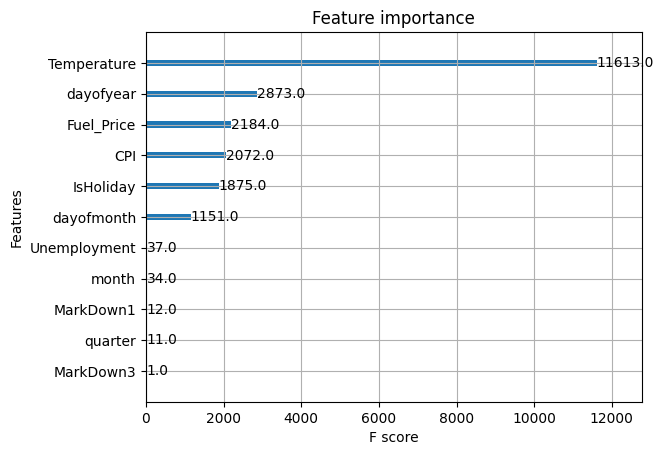

In [19]:
# Feature importance 
xgb.plot_importance(reg)

### Linear regression 

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Evaluating the model 

# Getting the predicted values from the regressor 
test['Predictions_LR'] = lr.predict(X_test)

# Evaluation metrics
mse = mean_absolute_error(test['Weekly_Sales'], test['Predictions'])
mae = mean_absolute_error(test['Weekly_Sales'], test['Predictions'])
r2 = r2_score(test['Weekly_Sales'], test['Predictions'])

# Printing the evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 20574.7895
Mean Absolute Error: 20574.7895
R-squared: 0.0013


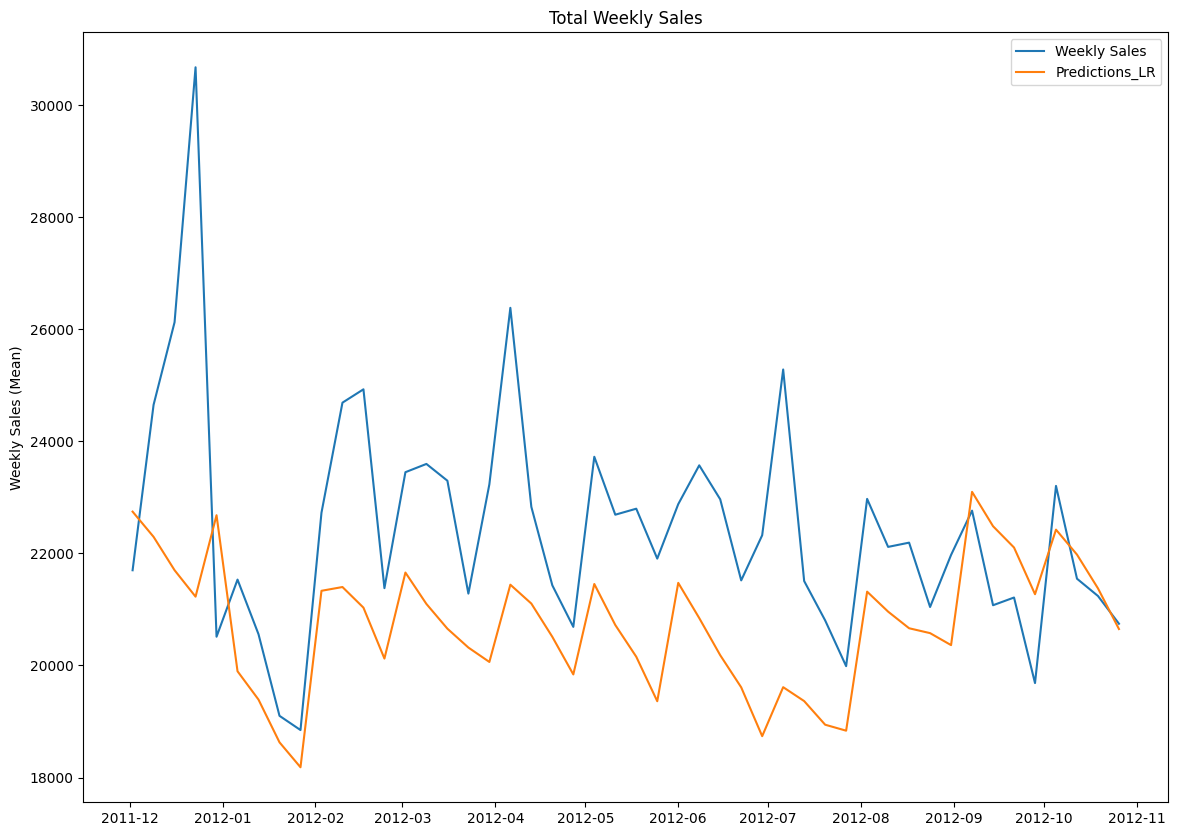

In [22]:
# Plotting the visualizations 

# Grouping the testset to prepare for visualizations
test.reset_index(inplace=True)
test_date = test.groupby('Date').agg({'Weekly_Sales': 'mean',
                                        'Predictions_LR': 'mean'}).reset_index()

# Plotting both 'Weekly_Sales' and 'Predictions'
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(test_date['Date'], test_date['Weekly_Sales'], label='Weekly Sales')
ax.plot(test_date['Date'], test_date['Predictions_LR'], label='Predictions_LR')

# Adding labels and title
ax.set_ylabel("Weekly Sales (Mean)")
ax.set_title('Total Weekly Sales')
ax.legend()

# Displaying the plot
plt.show()

#### Testing out MICE for imputing missing values

https://medium.com/@brijesh_soni/topic-9-mice-or-multivariate-imputation-with-chain-equation-f8fd435ca91

In [101]:
# Importing datasets 
features = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/stores data-set.csv")

In [102]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [103]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
sales['Dept'] = label_encoder.fit_transform(sales['Dept'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

In [104]:
features_copy = features.copy()

In [105]:
# MICE for missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [106]:
missing_mask = features_copy.isna()

In [107]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [108]:
features_date = features['Date']
features_copy.drop(columns=['Date'], inplace=True)

In [109]:
imputed_values = imputer.fit_transform(features_copy)

In [110]:
# Reconstruct a DataFrame with imputed values
features_copy = pd.DataFrame(imputed_values, columns=features_copy.columns)

In [111]:
# Add the 'Date' column back to the DataFrame
features_copy['Date'] = features['Date']

In [112]:
features_copy.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Date
0,1.0,42.31,2.572,7345.824070,10439.502127,1398.166232,2552.504870,4134.130746,211.096358,8.106,0.0,2010-02-05
1,1.0,38.51,2.548,8258.690981,21143.812470,736.980526,2638.691588,4211.985258,211.242170,8.106,1.0,2010-02-12
2,1.0,39.93,2.514,7367.682807,11015.703682,1364.814152,2541.468749,4133.908627,211.289143,8.106,0.0,2010-02-19
3,1.0,46.63,2.561,7286.364917,9929.057458,1431.044950,2539.046184,4128.084795,211.319643,8.106,0.0,2010-02-26
4,1.0,46.50,2.625,7298.895684,9645.835069,1445.503167,2557.928632,4131.823321,211.350143,8.106,0.0,2010-03-05


In [116]:
features1234 = features_copy.groupby('Date').agg({'MarkDown1': 'mean',
                                                  'MarkDown2': 'mean',
                                                  'MarkDown3': 'mean',
                                                  'MarkDown4': 'mean',
                                                  'MarkDown5': 'mean'}).reset_index()

The evaluation metrics was reduced when i used MICE for imputing missing values

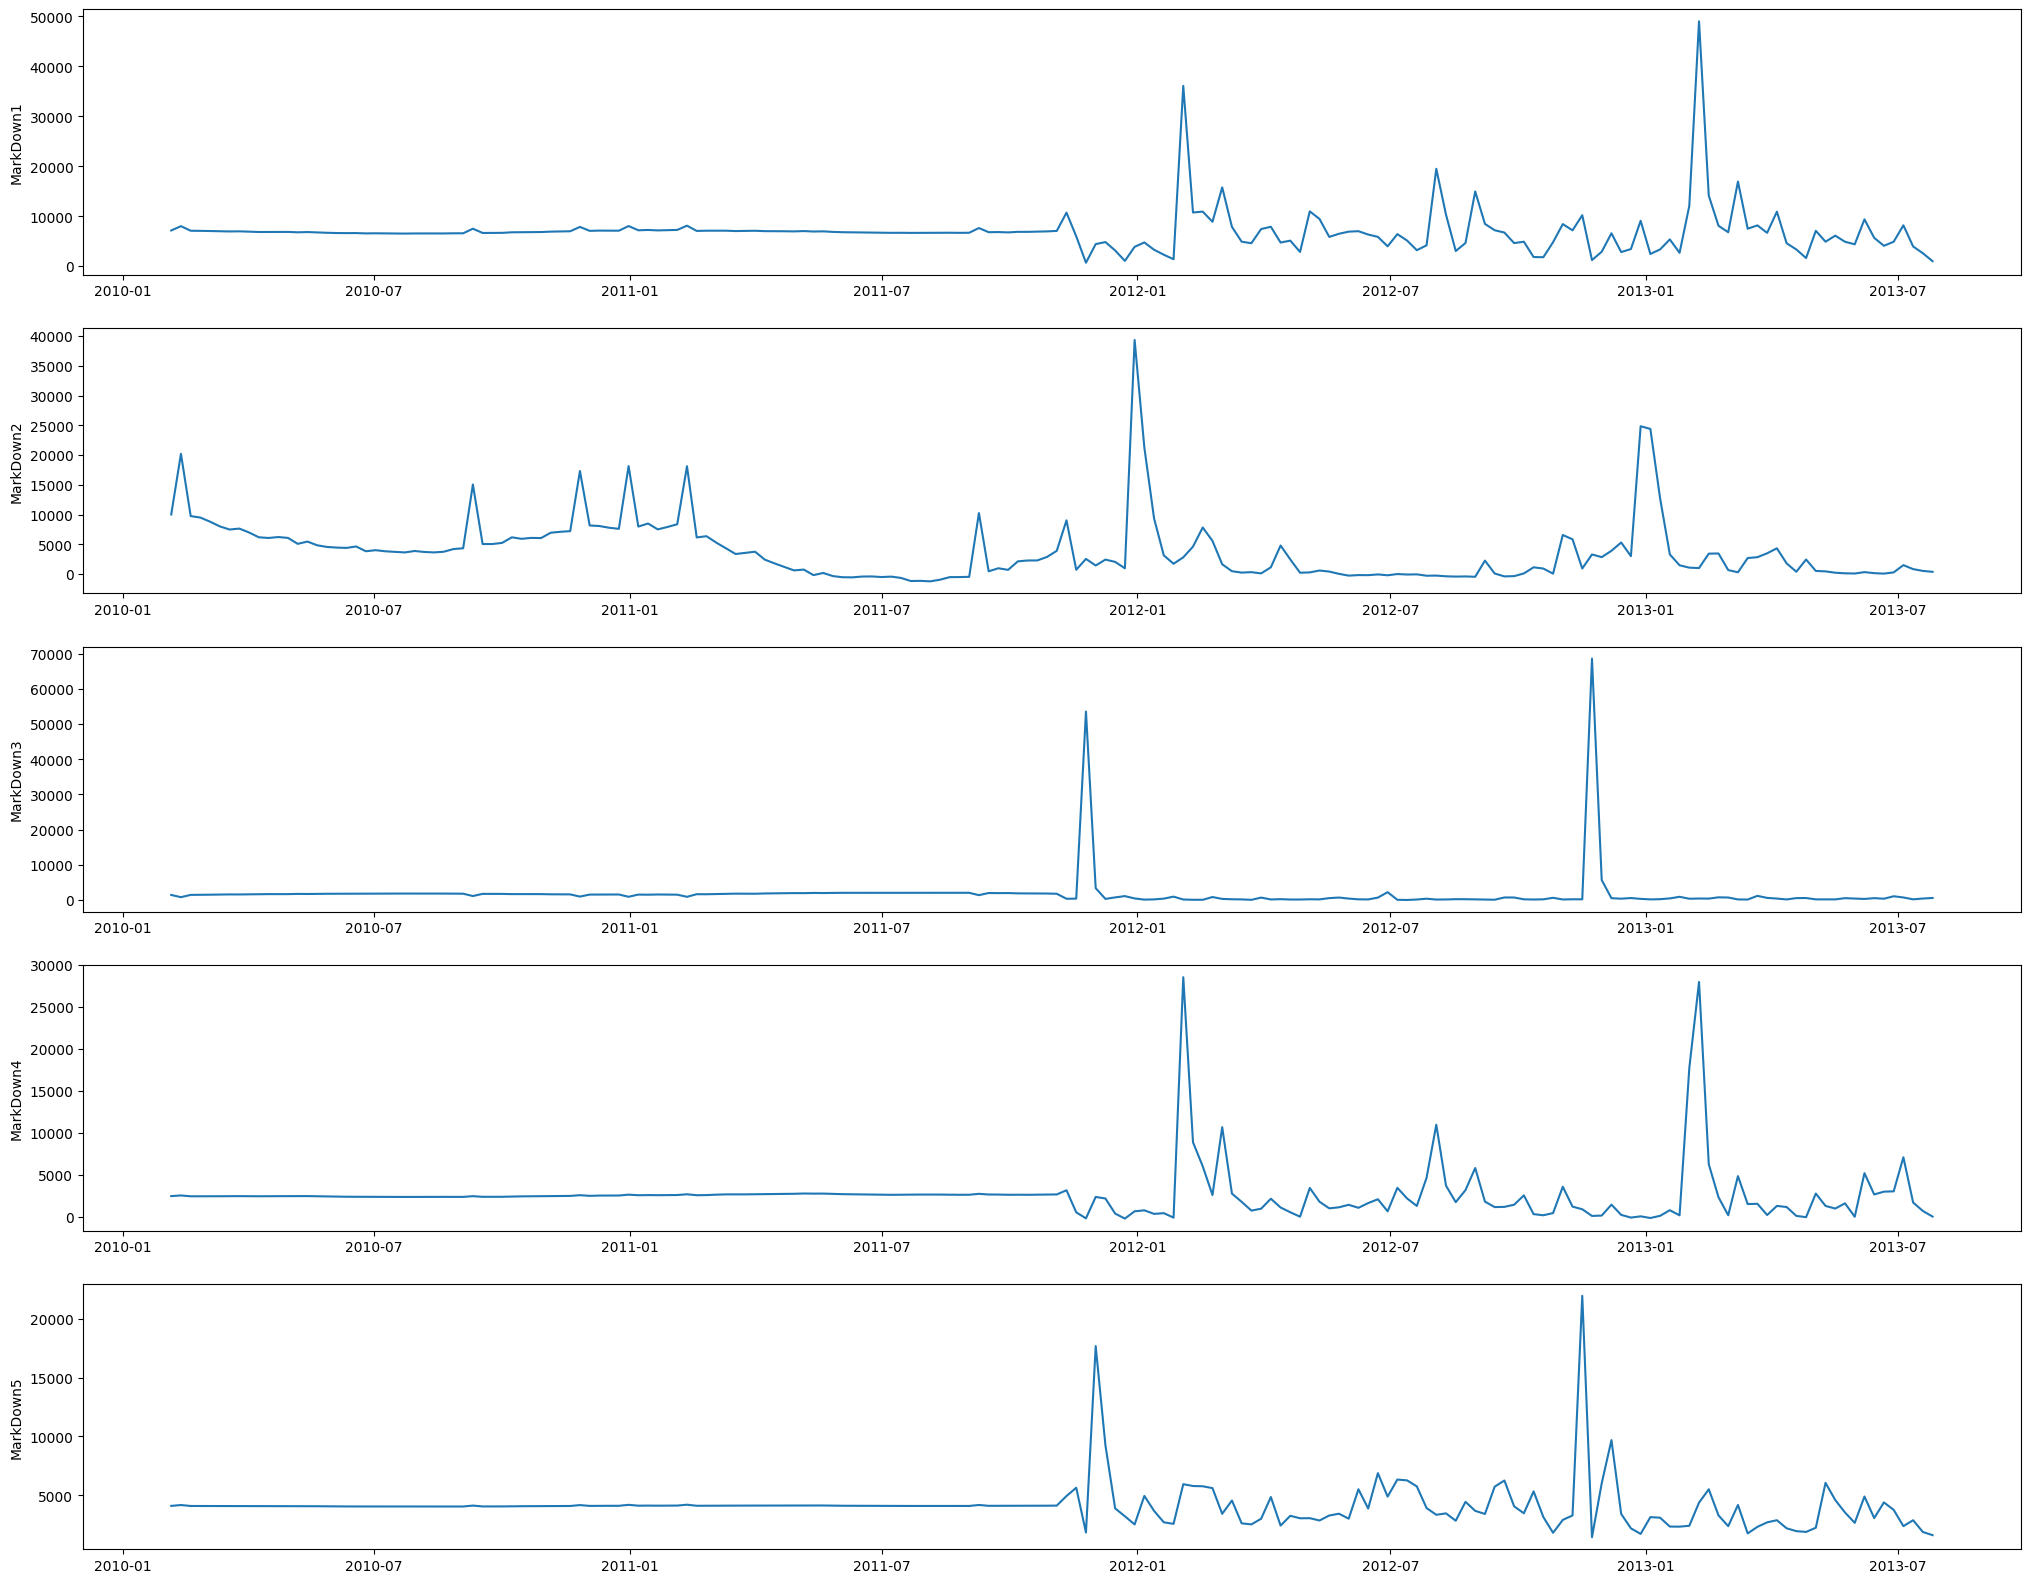

In [117]:
# Plotting all features
fig = plt.figure(figsize = (25, 20))
count_columns_ex_dateMD = len(features1234.columns[1:])
for idx, col in enumerate(features1234.columns[1:]):
    plt.subplot(count_columns_ex_dateMD, 1, idx+1)
    plt.plot(features1234["Date"], features1234[col])
    plt.ylabel(col)

After looking at the imputed values, we may just add zeros so that we do not loose all information in these features

# Trying something so that it works

In [238]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, accuracy_score

In [239]:
# Importing datasets 
features = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/stores data-set.csv")

In [240]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [205]:
# Dropping unnecessary columns
sales.drop(columns=['Dept'], inplace=True)

In [241]:
# Forwoard fill impution for 'CPI' and 'Unemployment'
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [242]:
features['Week'] = features.Date.dt.week

C:\Users\fredr\AppData\Local\Temp\ipykernel_16372\2978714185.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  features['Week'] = features.Date.dt.week


In [243]:
# Imputing Markdown columns
# Impute NaN values based on weekly average
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_columns:
    weekly_avg = features.groupby('Week')[col].transform('mean')
    features[col].fillna(weekly_avg, inplace=True)

# can't impute all values for MarkDown2 , dropping Markdown2.

features.drop('MarkDown2', axis = 1, inplace=True)
features.drop('Week', axis=1, inplace=True)
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,False


In [244]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
sales['Dept'] = label_encoder.fit_transform(sales['Dept'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

In [245]:
# Merging the data
tmp_df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(stores, tmp_df, on=['Store'], how='left')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,0,2010-02-05,24924.50,0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106
1,1,0,151315,0,2010-02-12,46039.49,1,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106
2,1,0,151315,0,2010-02-19,41595.55,0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106
3,1,0,151315,0,2010-02-26,19403.54,0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106
4,1,0,151315,0,2010-03-05,21827.90,0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106


In [246]:
from sklearn.preprocessing import StandardScaler

def normalize_col(data):
    scaler = StandardScaler()
    for col in data.columns.values.tolist():
        if col != 'Date':
            data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

df_scaled = normalize_col(df)
df_scaled.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,-1.658199,-0.885307,0.239209,-1.560345,2010-02-05,0.393782,-0.275106,-0.963798,-1.720834,2.510646,-0.110208,4.135339,-0.003344,1.018774,0.078201
1,-1.658199,-0.885307,0.239209,-1.560345,2010-02-12,1.323501,3.634961,-1.169783,-1.773177,3.380049,-0.110327,3.256627,0.230207,1.022498,0.078201
2,-1.658199,-0.885307,0.239209,-1.560345,2010-02-19,1.127829,-0.275106,-1.092810,-1.847330,0.776302,-0.127816,0.700341,0.374179,1.023697,0.078201
3,-1.658199,-0.885307,0.239209,-1.560345,2010-02-26,0.150687,-0.275106,-0.729625,-1.744825,0.170943,-0.132057,-0.100926,0.067283,1.024476,0.078201
4,-1.658199,-0.885307,0.239209,-1.560345,2010-03-05,0.257435,-0.275106,-0.736672,-1.605243,0.589593,-0.132519,0.560425,-0.332666,1.025255,0.078201


In [247]:
# Creating time features 
df_scaled['DayOfMonth'] = df_scaled['Date'].dt.day
df_scaled['DayOfWeek'] = df_scaled['Date'].dt.dayofweek
df_scaled['Quarter'] = df_scaled['Date'].dt.quarter
df_scaled['Month'] = df_scaled['Date'].dt.month
df_scaled['Year'] = df_scaled['Date'].dt.year
df_scaled['DayOfYear'] = df_scaled['Date'].dt.dayofyear
df_scaled['WeekOfYear'] = df_scaled['Date'].dt.weekofyear

C:\Users\fredr\AppData\Local\Temp\ipykernel_16372\1918368491.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_scaled['WeekOfYear'] = df_scaled['Date'].dt.weekofyear


In [248]:
# Splitting the data into train- and test set
split_indx = int(0.8*len(df_scaled))

train = df_scaled[:split_indx]
test = df_scaled[split_indx:]

In [249]:
# Setting date as index 
train = train.set_index('Date')
test = test.set_index('Date')

In [250]:
# Defining target variable and features 
X_train = train.drop('Weekly_Sales', axis=1)
y_train = train['Weekly_Sales']

X_test = test.drop('Weekly_Sales', axis=1)
y_test = test['Weekly_Sales']

In [251]:
# Initialize Linear Regression 
osl = LinearRegression()
osl.fit(X_train, y_train)

LinearRegression()

In [252]:
# Evaluating the model 

# Getting the predicted values from the regressor 
test['OSL_Predictions'] = osl.predict(X_test)

# Evaluation metrics
mse = mean_absolute_error(test['Weekly_Sales'], test['OSL_Predictions'])
mae = mean_absolute_error(test['Weekly_Sales'], test['OSL_Predictions'])
r2 = r2_score(test['Weekly_Sales'], test['OSL_Predictions'])

# Printing the evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.5144
Mean Absolute Error: 0.5144
R-squared: -0.0158


In [253]:
# Initialize XGBoost Regressor
xgb = XGBRegressor(n_estimators=1000)
xgb.fit(X_train,y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [254]:
# Evaluating the model 

# Getting the predicted values from the regressor 
test['XGB_Predictions'] = xgb.predict(X_test)

# Evaluation metrics
mse = mean_absolute_error(test['Weekly_Sales'], test['XGB_Predictions'])
mae = mean_absolute_error(test['Weekly_Sales'], test['XGB_Predictions'])
r2 = r2_score(test['Weekly_Sales'], test['XGB_Predictions'])

# Printing the evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.2867
Mean Absolute Error: 0.2867
R-squared: 0.7049


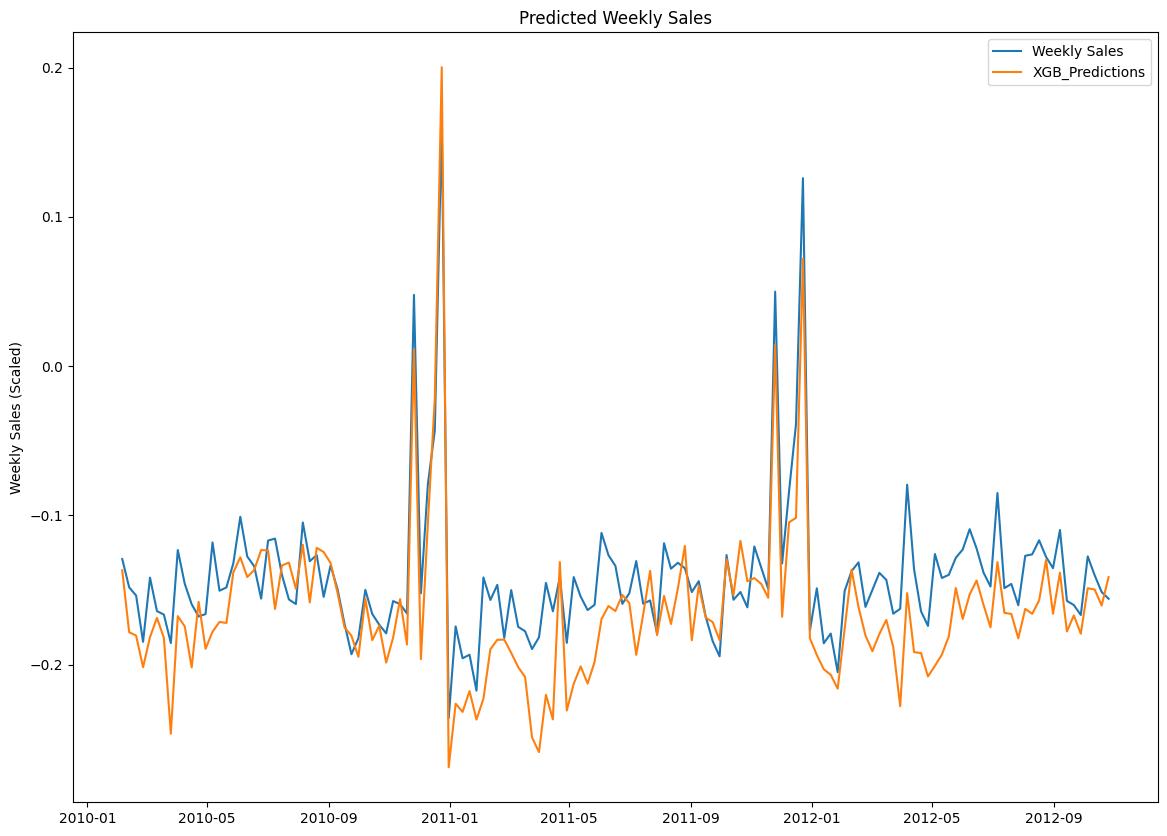

In [255]:
# Plotting the visualizations 

# Grouping the testset to prepare for visualizations
test.reset_index(inplace=True)
test_date = test.groupby('Date').agg({'Weekly_Sales': 'mean',
                                        'XGB_Predictions': 'mean'}).reset_index()

# Plotting both 'Weekly_Sales' and 'Predictions'
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(test_date['Date'], test_date['Weekly_Sales'], label='Weekly Sales')
ax.plot(test_date['Date'], test_date['XGB_Predictions'], label='XGB_Predictions')

# Adding labels and title
ax.set_ylabel("Weekly Sales (Scaled)")
ax.set_title('Predicted Weekly Sales')
ax.legend()

# Displaying the plot
plt.show()

In [256]:
from xgboost import plot_importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

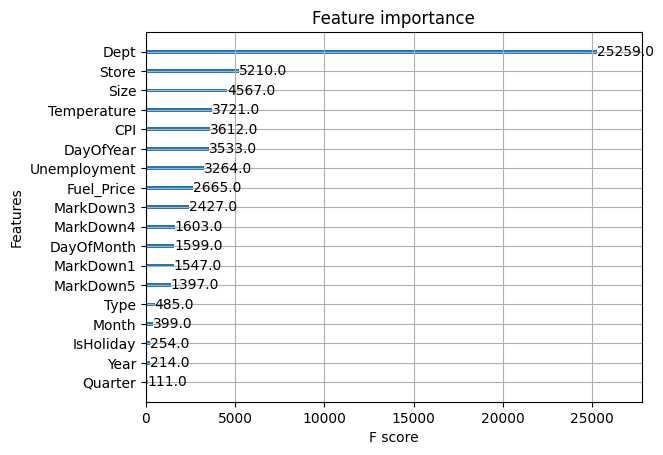

In [257]:
plot_importance(xgb)